# Import Required Libraries
Import the necessary libraries, including pandas and matplotlib.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Load CSV File
Use pandas to load the CSV file into a DataFrame.

Note: The max ADC value from the as7341 sensor is: 65535

WARNING: Remember to edit the time window of the display data below

In [8]:
import ssl
import requests
import io

# Load CSV File with approximately 43 lines of non-csv metadata
startParsingAtLine = 42 #Normally 43

# Load the CSV file into a DataFrame
url = 'https://raw.githubusercontent.com/jongarrison/marine_sciences_data/refs/heads/main/kdupro/2025-05-21_disco_bay/2025-05-21_surface_discobay.txt'
samplingStartTime = '10:00:00'
samplingEndTime = '11:18:00'

response = requests.get(url)

print(f"Received response code: {response.status_code}")

print(f"Text:\n{response.text[:1500]}")  # Print the first 1000 characters of the response text

Received response code: 200
Text:
METADATA
initial_wait_s: 15
measures: 1
period_ms: 1000
depth: 0.5
name: kdupro01
buoy: 1
country: colombia
place: akuara
maker: udea
curator: icm-csic
email: rodero@icm.csic.es
sensors: tcs34725
description: calibration
units: counts,
latitude: 41.383189
longitude: 2.197949
altitude: 0
ref_coord_system: wgs84
location_source: gnss
time_source: internet
processing_level: 0
processing_procedure: https://git.csic.es/kduino/kdupro
processing_version: build
processing_revision: 0
calibration_procedure: https://git.csic.es/kduino/kdupro
calibration_reference: 0
calibration_time: 0
calibration_version: 0
sensor_id: 
platform_id: 
deployment_id: 
sample_id: 
observer_id: 
owner_contact: jpiera@icm.csic.es
operator_contact: rodero@icm.csic.es
license: mit
license_reference: https://opensource.org/licenses/mit
embargo_date: 
datetime: yyyy-mm-ddthh:mm:ssz
time: 2025-05-21T09:37:06:096Z
DATA
TIME F1-415nm F2-445nm F3-480nm F4-515nm F5-555nm F6-590nm F7-630nm F8-

In [9]:

df = pd.read_csv(io.StringIO(response.text), header=0, skiprows=startParsingAtLine, skip_blank_lines=True, sep=" ")

display(HTML("<h1>HEAD</h1>"))
# Display the first few rows of the DataFrame without wrapping columns
display(HTML(df.head().to_html()))

display(HTML("<h1>TAIL</h1>"))
display(HTML(df.tail().to_html()))

display(HTML("<h1>Describe</h1>"))
# Display summary statistics of the DataFrame

display(HTML(df.describe().to_html()))

display(HTML("<h1>Data Types</h1>"))
# Display data types of the DataFrame
print(df.dtypes)

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

,TIME,F1-415nm,F2-445nm,F3-480nm,F4-515nm,F5-555nm,F6-590nm,F7-630nm,F8-680nm,Clear,Near-IR
0,2025-05-21T10:05:51:157Z,4530.0,6024.0,8308.0,9705.0,12878.0,13734.0,17218.0,20466.0,36343.0,19365.0
1,2025-05-21T10:05:52:190Z,8183.0,12087.0,16243.0,18926.0,21282.0,22931.0,26544.0,31956.0,65535.0,41858.0
2,2025-05-21T10:05:53:223Z,9154.0,13478.0,17922.0,21295.0,18292.0,19484.0,23257.0,27194.0,65535.0,37254.0
3,2025-05-21T10:05:54:256Z,2606.0,3666.0,5027.0,5331.0,5964.0,6212.0,7523.0,9149.0,36016.0,20611.0
4,2025-05-21T10:05:55:288Z,1350.0,1785.0,2390.0,2808.0,4207.0,4547.0,5840.0,7402.0,14512.0,11309.0


,TIME,F1-415nm,F2-445nm,F3-480nm,F4-515nm,F5-555nm,F6-590nm,F7-630nm,F8-680nm,Clear,Near-IR
1878,2025-05-21T10:38:12:584Z,1730.0,2641.0,3498.0,4357.0,4569.0,5181.0,6214.0,7298.0,24449.0,12471.0
1879,2025-05-21T10:38:13:616Z,1862.0,2880.0,3851.0,4634.0,4562.0,5135.0,6067.0,7059.0,24190.0,12520.0
1880,2025-05-21T10:38:14:647Z,1205.0,1700.0,2301.0,2850.0,2759.0,3361.0,3871.0,4690.0,14416.0,7557.0
1881,2025-05-21T10:38:15:679Z,1001.0,1343.0,1842.0,2243.0,2426.0,2889.0,3136.0,4065.0,10991.0,5880.0
1882,2025-05-21T10:38:16:711Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,F1-415nm,F2-445nm,F3-480nm,F4-515nm,F5-555nm,F6-590nm,F7-630nm,F8-680nm,Clear,Near-IR
count,1882.000000,1882.000000,1882.000000,1882.000000,1882.000000,1882.000000,1882.000000,1882.000000,1882.000000,1882.000000
mean,9874.374070,14481.332625,19272.488310,22987.257705,25248.346971,26742.551541,31227.533475,36324.269926,65073.584485,50808.589267
std,1302.084398,2224.401585,2836.755242,3369.371786,3796.366604,3790.044161,4649.270942,5546.865812,4265.657230,5122.982962
min,852.000000,922.000000,1264.000000,1443.000000,2426.000000,2889.000000,3136.000000,4065.000000,10991.000000,5880.000000
25%,8980.000000,12594.000000,17043.500000,20263.250000,22117.000000,23757.250000,27353.000000,31496.500000,65535.000000,48894.250000
50%,10084.500000,15004.000000,19810.000000,23591.000000,26046.500000,27454.500000,31874.500000,37799.500000,65535.000000,50546.500000
75%,10750.000000,16173.750000,21457.750000,25418.500000,28161.500000,29455.000000,34642.750000,40659.250000,65535.000000,53739.250000
max,11865.000000,17921.000000,23597.000000,28275.000000,31177.000000,32841.000000,38467.000000,45289.000000,65535.000000,57871.000000


TIME         object
F1-415nm    float64
F2-445nm    float64
F3-480nm    float64
F4-515nm    float64
F5-555nm    float64
F6-590nm    float64
F7-630nm    float64
F8-680nm    float64
Clear       float64
Near-IR     float64
dtype: object
Missing values in each column:
 TIME        0
F1-415nm    1
F2-445nm    1
F3-480nm    1
F4-515nm    1
F5-555nm    1
F6-590nm    1
F7-630nm    1
F8-680nm    1
Clear       1
Near-IR     1
dtype: int64


# Data Visualization
Use matplotlib to visualize the data (e.g., line plots, histograms).

                       TIME  F1-415nm  F2-445nm  F3-480nm  F4-515nm  F5-555nm  \
0  2025-05-21T10:05:51:157Z    4530.0    6024.0    8308.0    9705.0   12878.0   
1  2025-05-21T10:05:52:190Z    8183.0   12087.0   16243.0   18926.0   21282.0   
2  2025-05-21T10:05:53:223Z    9154.0   13478.0   17922.0   21295.0   18292.0   
3  2025-05-21T10:05:54:256Z    2606.0    3666.0    5027.0    5331.0    5964.0   
4  2025-05-21T10:05:55:288Z    1350.0    1785.0    2390.0    2808.0    4207.0   

   F6-590nm  F7-630nm  F8-680nm    Clear  Near-IR  
0   13734.0   17218.0   20466.0  36343.0  19365.0  
1   22931.0   26544.0   31956.0  65535.0  41858.0  
2   19484.0   23257.0   27194.0  65535.0  37254.0  
3    6212.0    7523.0    9149.0  36016.0  20611.0  
4    4547.0    5840.0    7402.0  14512.0  11309.0  


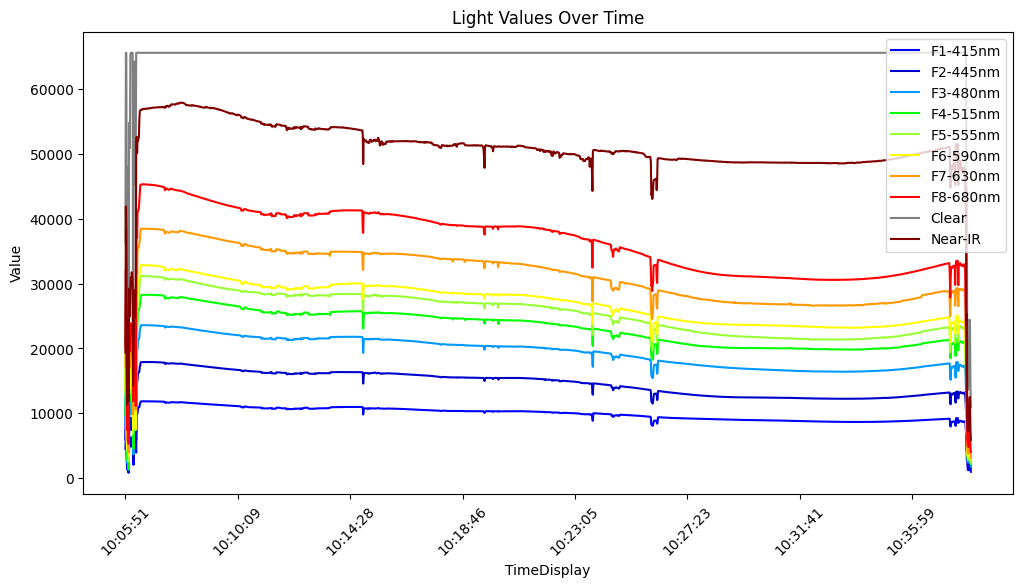

In [10]:
# Dictionary of the df column names as keys and the pandas rgb value associated with the mentioned wavelength of light:
color_dict = {
    'F1-415nm': '#0000FF',  # Blue
    'F2-445nm': '#0000CC',  # Dark Blue
    'F3-480nm': '#0099FF',  # Light Blue
    'F4-515nm': '#00FF00',  # Green
    'F5-555nm': '#99FF33',  # Light Green
    'F6-590nm': '#FFFF00',  # Yellow
    'F7-630nm': '#FF9900',  # Orange
    'F8-680nm': '#FF0000',  # Red
    'Clear': '#808080',     # Gray
    'Near-IR': '#800000'    # Maroon
}

print(df.head())

# Convert the TIME column to a standard timestamp format
#df['TimeStandard'] = pd.to_datetime(df['TIME'], format='%Y-%m-%dT%H:%M:%S:%fZ')
df['TimeStandard'] = pd.to_datetime(df['TIME'], format='%Y-%m-%dT%H:%M:%S:%fZ')

# Convert the TIME column to datetime format and create a new column with a more readable format
df['TimeDisplay'] = pd.to_datetime(df['TimeStandard']).dt.strftime('%H:%M:%S')

# Manually trim the rows to TimeDisplay values between start and end times
dfplot = df[(df['TimeDisplay'] >= samplingStartTime) & (df['TimeDisplay'] <= samplingEndTime)]


# Line plot for the first column (assuming it's a timestamp)
plt.figure(figsize=(12, 6))

# colNamesToPlot = ["Clear", "F7-630nm", "F8-680nm"]
# colNamesToPlot = ["Clear"]
colNamesToPlot = ["F1-415nm", "F2-445nm", "F3-480nm", "F4-515nm", "F5-555nm", "F6-590nm", "F7-630nm", "F8-680nm", "Clear", "Near-IR"]

for colName in colNamesToPlot:
    plt.plot(dfplot["TimeDisplay"], dfplot[colName], label=colName, color=color_dict[colName])

plt.xlabel('TimeDisplay')

plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=10))

plt.ylabel('Value')
plt.title('Light Values Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [11]:
def find_below_average_regions(df, column, time_column, min_time_width):
    """
    Find regions where a column's values are below the average for a minimum time width.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        column (str): The column to analyze.
        time_column (str): The column containing timestamps.
        min_time_width (str): Minimum time width for a region (e.g., '30s', '5min').

    Returns:
        list: A list of tuples (start_time, end_time) for regions below the average.
    """
    # Ensure the time column is in datetime format
    df[time_column] = pd.to_datetime(df[time_column])

    # Calculate the average of the column
    column_mean = df[column].mean()

    # Create a boolean mask for values below the average
    below_avg_mask = df[column] < column_mean

    # Group consecutive below-average values
    df['Group'] = (below_avg_mask != below_avg_mask.shift()).cumsum()
    below_avg_groups = df[below_avg_mask].groupby('Group')

    # Find regions where the time width exceeds the minimum threshold
    regions = []
    for _, group in below_avg_groups:
        start_time = group[time_column].iloc[0]
        end_time = group[time_column].iloc[-1]
        time_width = end_time - start_time

        # Check if the time width exceeds the minimum threshold
        if time_width >= pd.to_timedelta(min_time_width):
            regions.append((start_time, end_time))

    # Drop the temporary 'Group' column
    df.drop(columns=['Group'], inplace=True)

    return regions

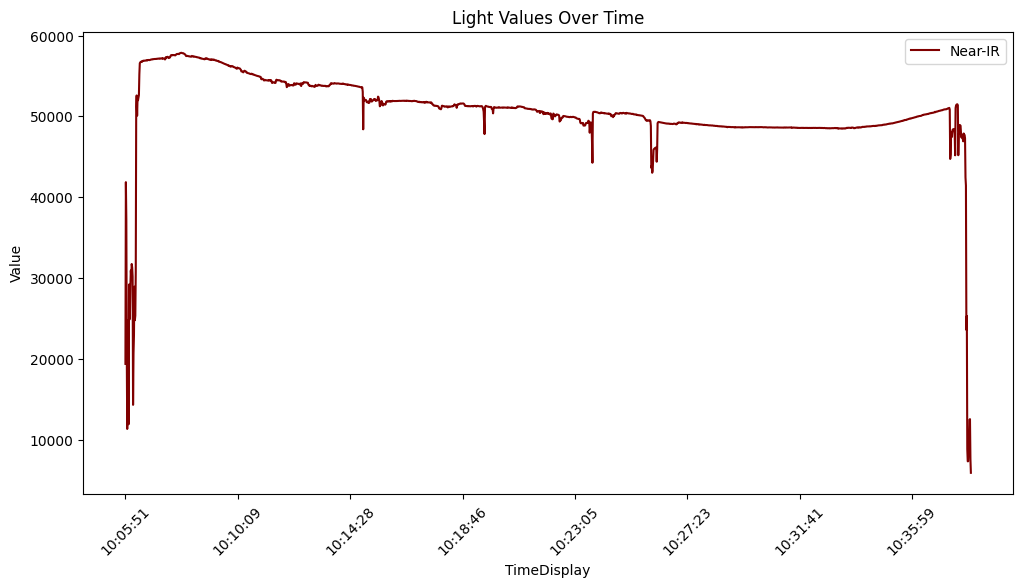

In [12]:

# Line plot for the first column (assuming it's a timestamp)
plt.figure(figsize=(12, 6))

# for colName in colNamesToPlot:
#     plt.plot(df["TimeDisplay"], df[colName], label=colName, color=color_dict[colName])


# Create new dataframe

# Create a new empty dataframe
dfid = pd.DataFrame()
dfid["TimeDisplay"] = df["TimeDisplay"]

rollingColNames = []
# for colName in colNamesToPlot:
#     # Create a new column name for the rolling average
#     rollingColName = colName + "_Moving_Avg"
#     dfid[colName] = df[colName].rolling(window=30).mean()
#     plt.plot(df["TimeDisplay"], df[colName], label=colName, color=color_dict[colName])


colName = "Near-IR"
plt.plot(df["TimeDisplay"], df[colName], label=colName, color=color_dict[colName])

colNamesToAverage = ["F1-415nm", "F2-445nm", "F3-480nm", "F4-515nm", "F5-555nm", "F6-590nm", "F7-630nm", "F8-680nm"]

# df["avg"] = df[colNamesToPlot].mean(axis=1)
# plt.plot(df["TimeDisplay"], df["avg"], label="Average", color="black", linestyle='--')

plt.xlabel('TimeDisplay')

plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=10))

plt.ylabel('Value')
plt.title('Light Values Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()


